In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
fb = pd.read_csv('football_admission_cleaned.csv').sort_values(by='YEAR')
# fb.index = fb[['INSTNM', 'YEAR']]
# fb.loc['Brigham Young University']
fb

,TEAM,YEAR,WON,LOST,TIED,WIN_RATE,REGION,ADM_RATE,ACTCMMID,SAT_AVG,...,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,UGDS_MEN,UGDS_WOMEN,ON_CAMPUS_EXPENSES,OFF_CAMPUS_EXPENSES,INSTNM
3912,Yale,1998,2.0,8.0,0.0,0.200000,1.0,0.1617,32.0,1465.0,...,0.0000,26100.0,26100.0,0.9434,0.9900,0.5049,0.4951,11140.0,11140.0,Yale University
232,Auburn,1998,8.0,4.0,0.0,0.666667,5.0,0.7594,24.0,1094.0,...,0.0000,3050.0,9150.0,0.6562,0.8500,0.5212,0.4788,7604.0,8309.0,Auburn University
962,Duquesne,1998,10.0,1.0,0.0,0.909091,2.0,0.9615,24.0,1080.0,...,0.0000,16520.0,16520.0,0.7193,0.8800,0.4154,0.5846,7714.0,7714.0,Duquesne University
2788,Rice,1998,7.0,4.0,0.0,0.636364,6.0,0.2341,32.0,1420.0,...,0.0000,16444.0,16444.0,0.9164,0.9800,0.5230,0.4770,8600.0,9580.0,Rice University
1801,Louisville,1998,5.0,6.0,0.0,0.454545,5.0,0.8911,23.0,1070.0,...,0.0000,3447.0,9746.0,0.3003,0.7600,0.4651,0.5349,7256.0,10360.0,University of Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,Idaho,2022,0.0,0.0,0.0,0.390152,7.0,0.7385,24.0,1129.0,...,0.0162,8396.0,27632.0,0.6110,0.7378,0.4999,0.5001,14450.0,14450.0,University of Idaho
3549,Vanderbilt,2022,0.0,9.0,0.0,0.000000,5.0,0.0667,35.0,1546.0,...,0.1750,60348.0,60348.0,0.9277,0.9643,0.4817,0.5183,24064.0,17772.0,Vanderbilt University
1448,Illinois,2022,2.0,6.0,0.0,0.250000,3.0,0.4482,32.0,1440.0,...,0.2222,15714.0,33686.0,0.8469,0.9332,0.5335,0.4665,16420.0,10258.0,University of Illinois Urbana-Champaign
3574,Villanova,2022,0.0,0.0,0.0,0.730769,2.0,0.2339,33.0,1454.0,...,0.0725,61618.0,61618.0,0.9063,0.9604,0.4630,0.5370,19487.0,19487.0,Villanova University


In [30]:
cols = ['UGDS', "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_MEN", "UGDS_WOMEN", "C150_4", "RET_FT4", "SAT_AVG", "ACTCMMID", "ADM_RATE"]
diff_cols = ["D_" + col for col in cols]

dfs = []
for group, df in fb.groupby('INSTNM'):
    df[diff_cols] = df[cols].diff(axis=0)
    df['INSTNM'] = group
    dfs.append(df)

fb = pd.concat(dfs)
fb = fb.dropna()
fb
fb.to_csv("football_admission_diff.csv")

In [11]:
scorecard = pd.read_csv("combined_scorecard_data.csv")

features = [
    "INSTNM",
    "Year",
    "REGION",
    "CCSIZSET",
    "ADM_RATE",
    "ACTCMMID",
    "SAT_AVG",
    "UGDS",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "C150_4",
    "RET_FT4",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "MDCOST_ALL"
]

scorecard_data = scorecard[features]

football_records = pd.read_csv("college_football_records.csv")
football_records = football_records[['year', 'won', 'lost', 'scorecard_name']]
football_records['WINPERC'] = football_records['won'] / (football_records['won'] + football_records['lost'])

merged = pd.merge(scorecard_data, football_records, right_on=['year', 'scorecard_name'], left_on=['Year', 'INSTNM'])
fb = merged.set_index(["INSTNM", "Year"])
fb

,,REGION,CCSIZSET,ADM_RATE,ACTCMMID,SAT_AVG,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,C150_4,RET_FT4,UGDS_MEN,UGDS_WOMEN,MDCOST_ALL,year,won,lost,scorecard_name,WINPERC
INSTNM,Year,,,,,,,,,,,,,,,,,,,,,
University of Alabama at Birmingham,1996,5,NaN,NaN,NaN,NaN,9889.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4322,0.5678,NaN,1996,5.0,6.0,University of Alabama at Birmingham,0.454545
The University of Alabama,1996,5,NaN,NaN,NaN,NaN,13948.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4767,0.5233,NaN,1996,10.0,3.0,The University of Alabama,0.769231
Auburn University,1996,5,NaN,NaN,NaN,NaN,18337.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5207,0.4793,NaN,1996,8.0,4.0,Auburn University,0.666667
Arizona State University Campus Immersion,1996,6,NaN,NaN,NaN,NaN,30680.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4944,0.5056,NaN,1996,11.0,1.0,Arizona State University Campus Immersion,0.916667
University of Arizona,1996,6,NaN,NaN,NaN,NaN,25158.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4935,0.5065,NaN,1996,5.0,6.0,University of Arizona,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia University,2022,5,16.0,0.8838,NaN,1116.0,18370.0,0.8158,0.0317,0.0422,0.0165,...,0.6212,0.7899,0.4858,0.5142,NaN,2022,5.0,7.0,West Virginia University,0.416667
University of Wisconsin-Madison,2022,3,16.0,0.4906,NaN,1374.0,35184.0,0.6249,0.0225,0.0752,0.0972,...,0.8923,0.9433,0.4692,0.5308,NaN,2022,7.0,6.0,University of Wisconsin-Madison,0.538462
University of Wyoming,2022,7,16.0,0.9598,NaN,NaN,8363.0,0.7790,0.0103,0.0838,0.0122,...,0.6088,0.7540,0.4686,0.5314,NaN,2022,7.0,6.0,University of Wyoming,0.538462


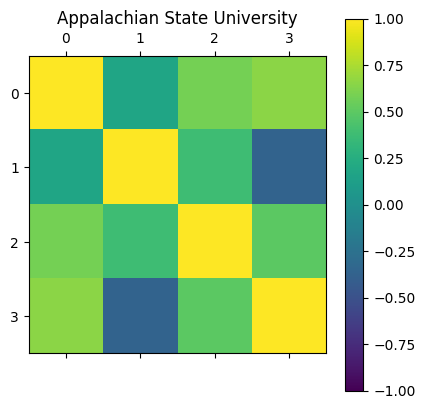

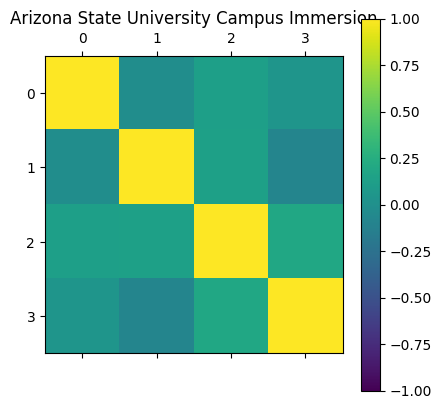

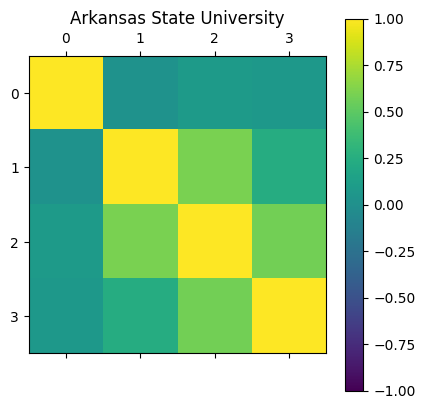

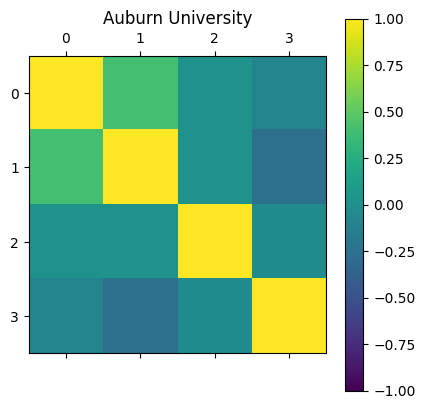

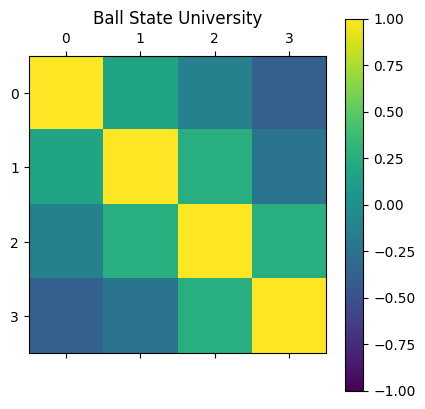

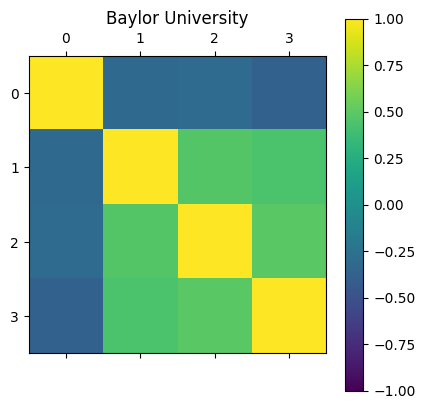

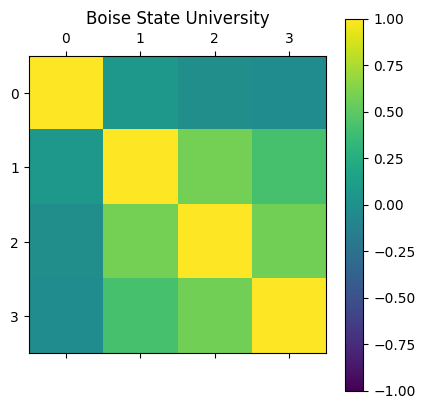

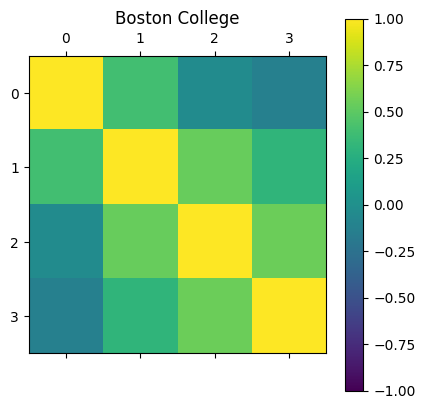

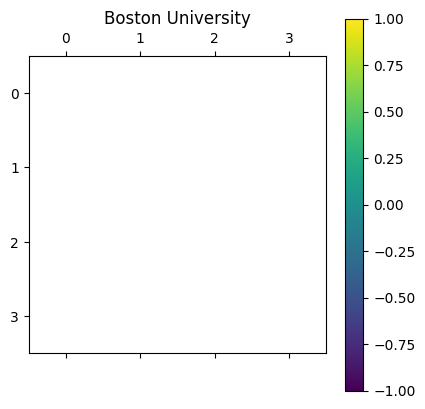

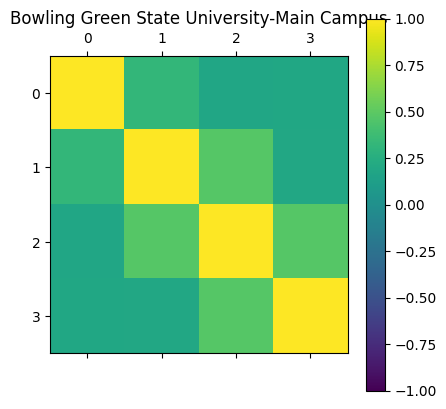

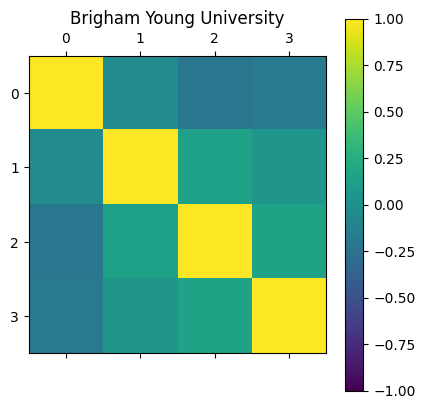

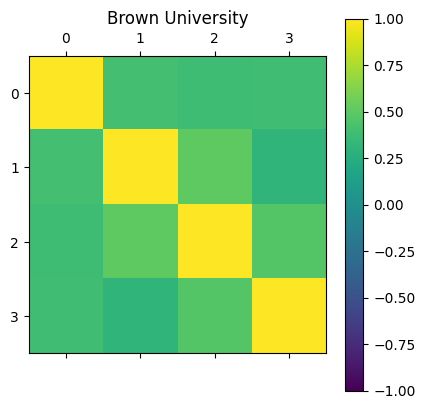

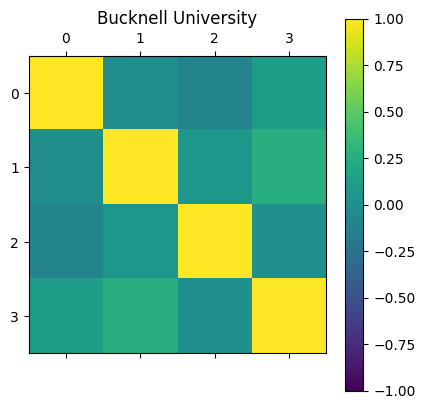

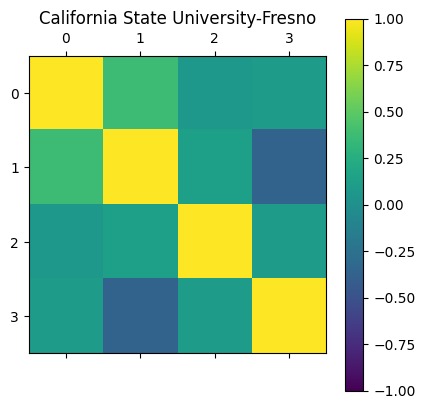

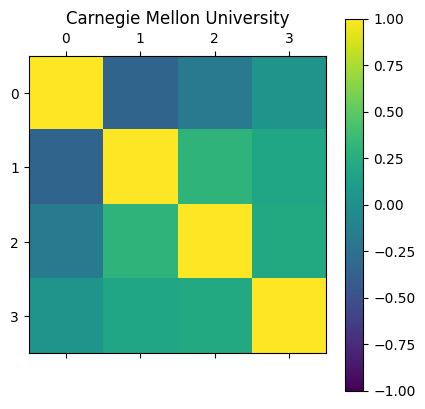

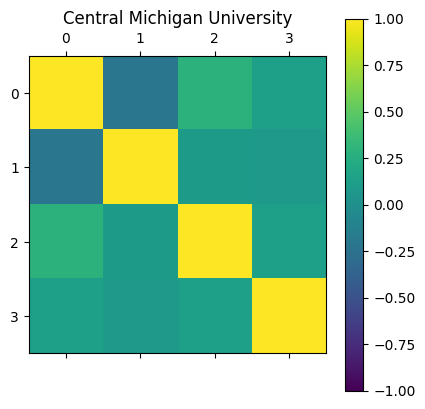

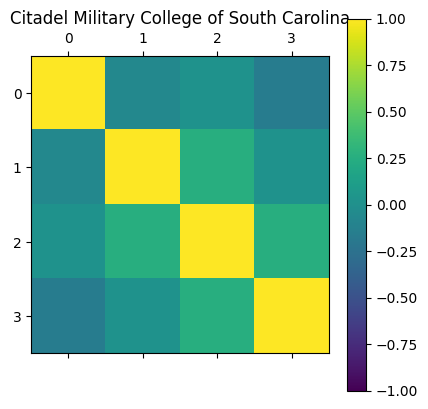

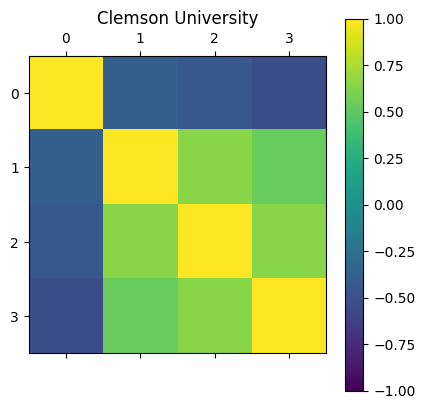

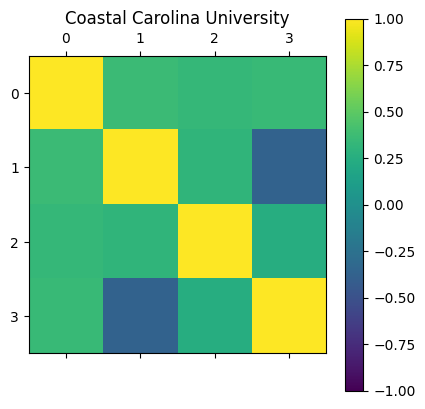

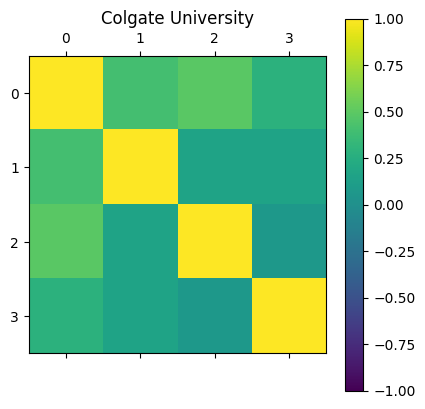

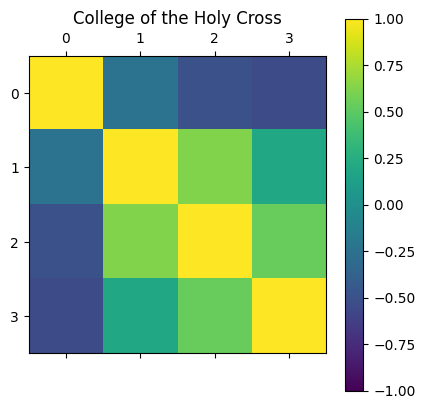

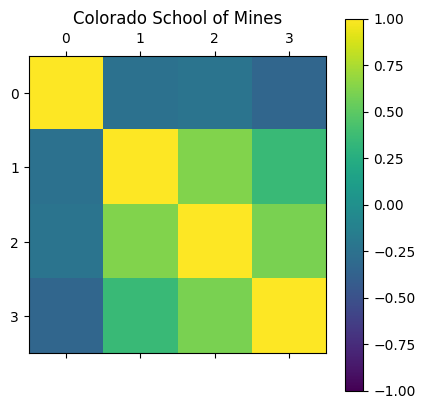

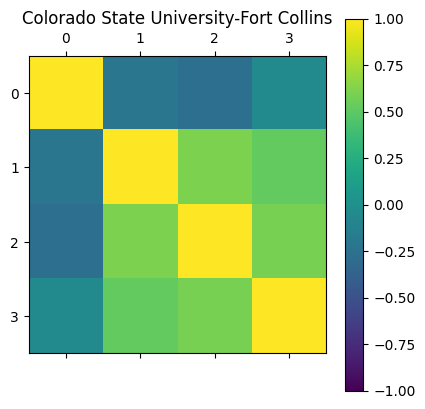

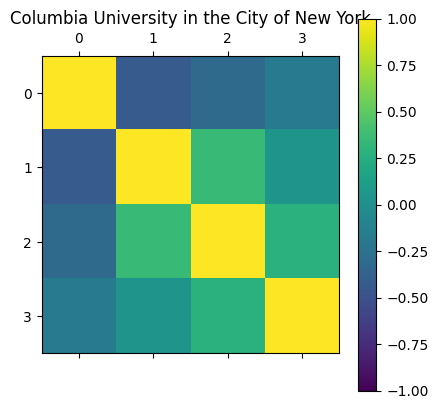

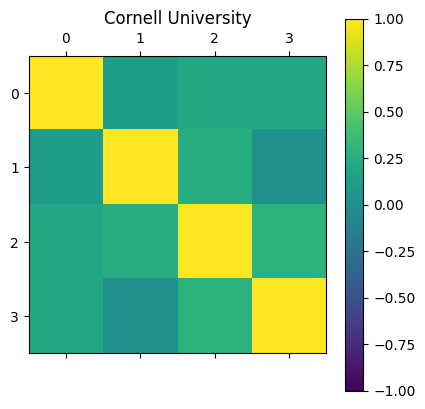

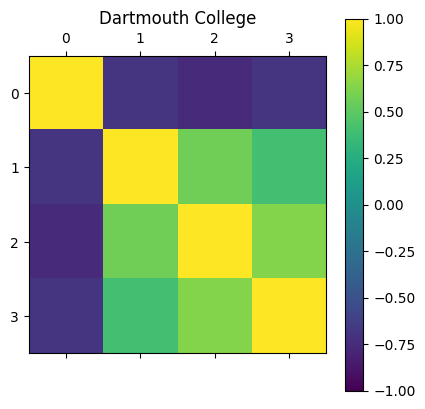

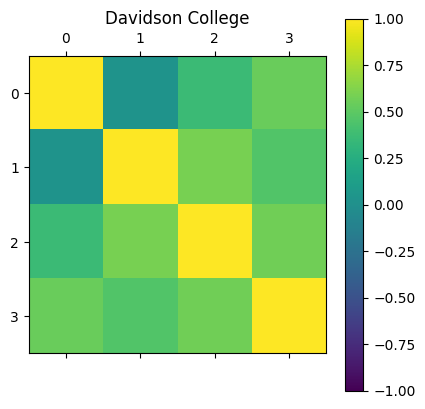

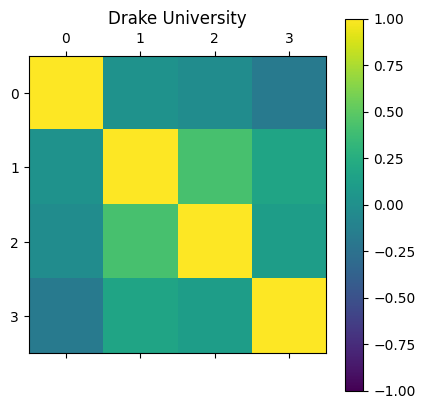

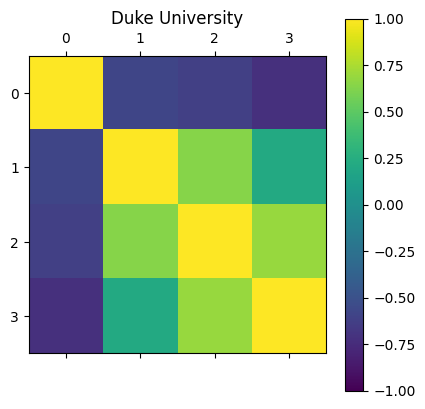

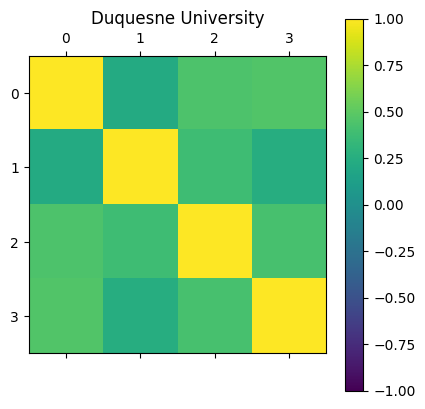

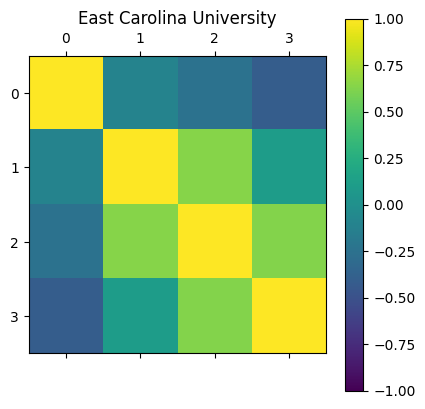

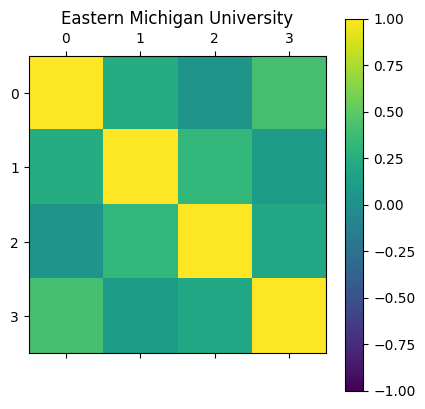

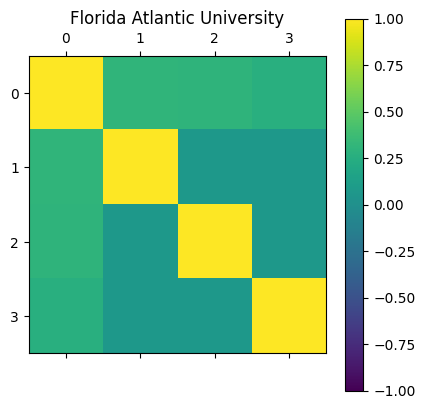

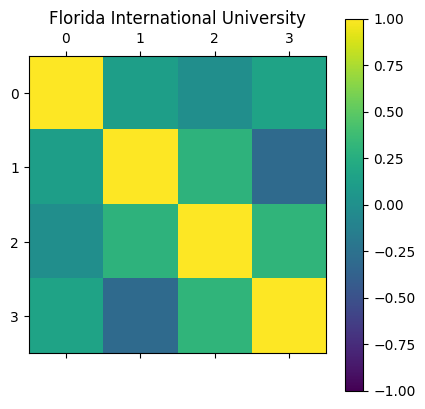

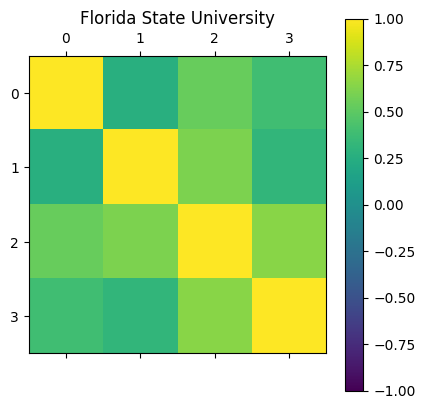

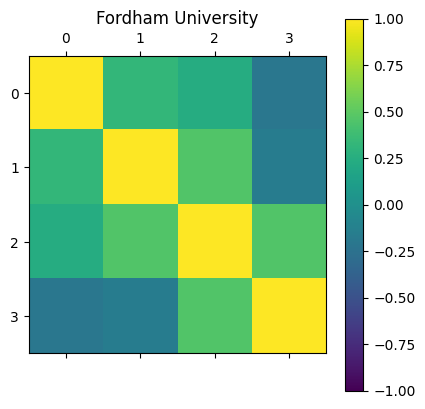

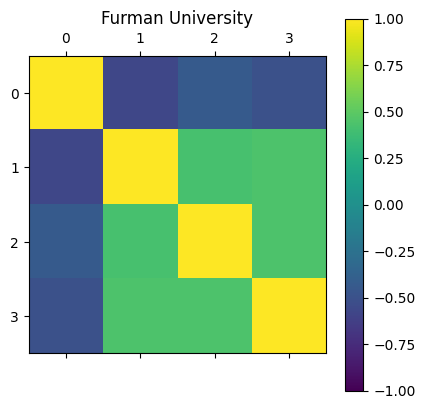

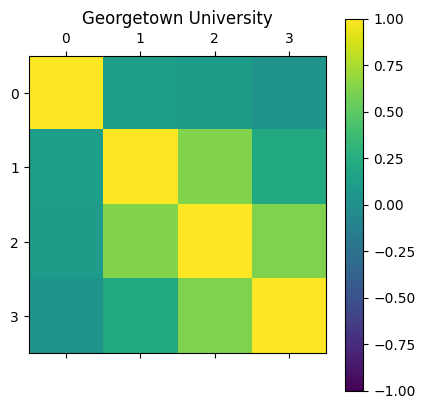

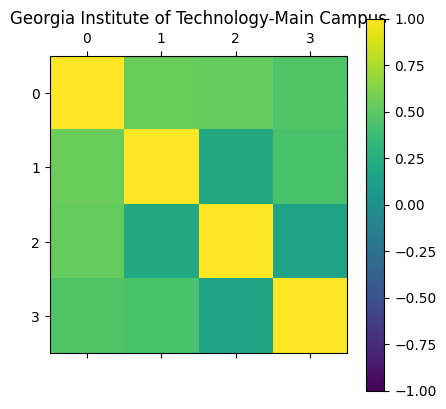

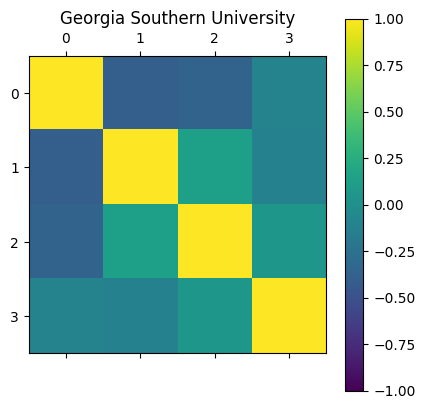

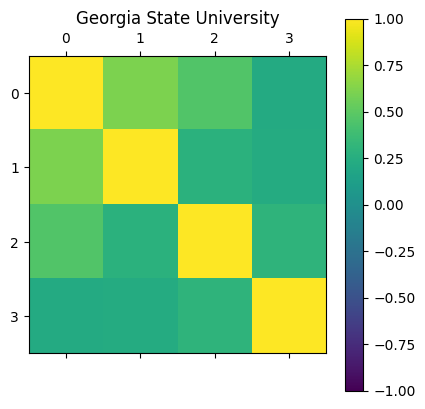

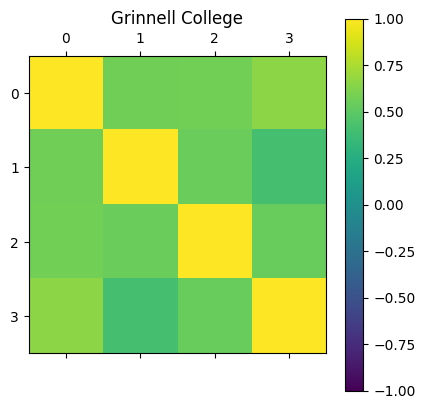

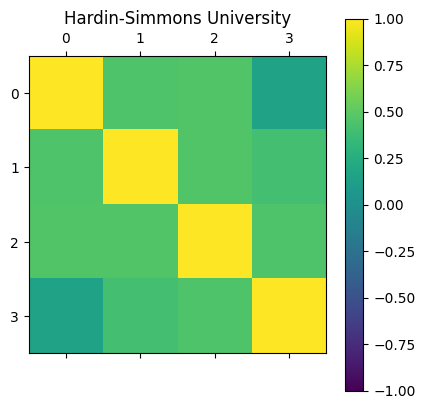

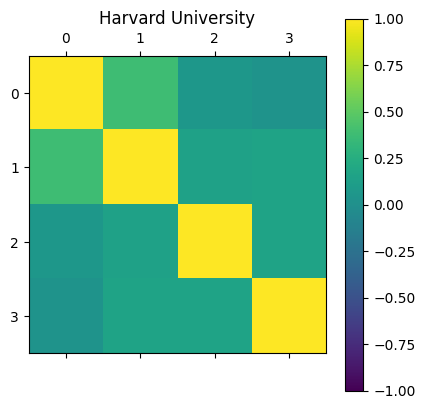

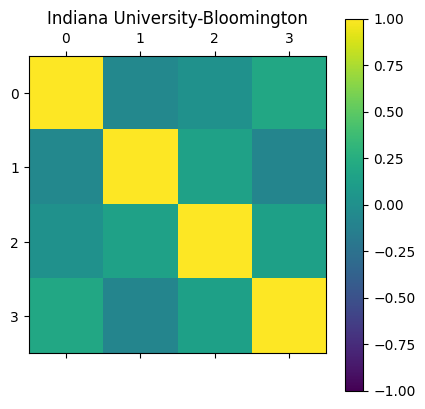

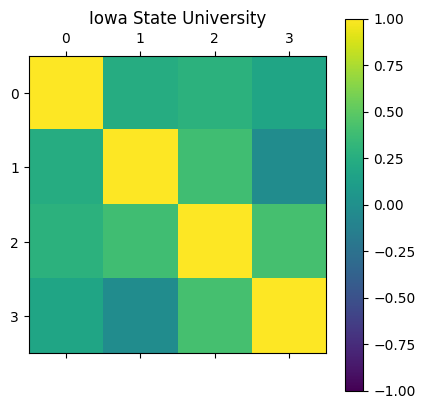

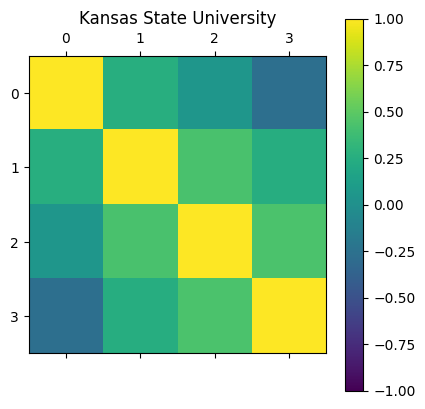

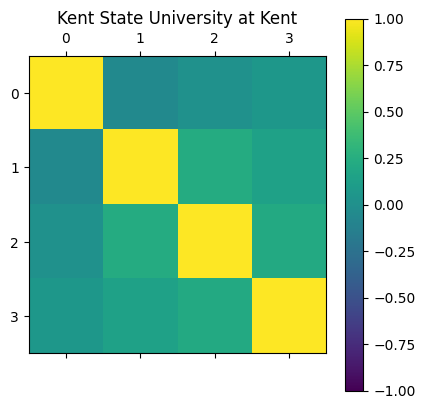

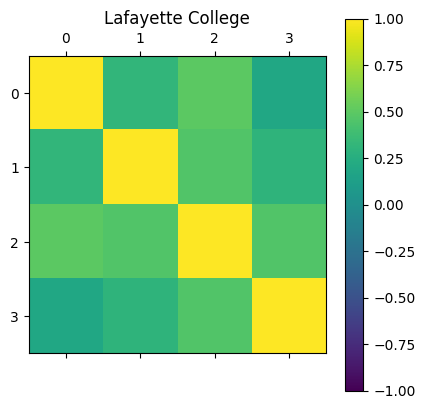

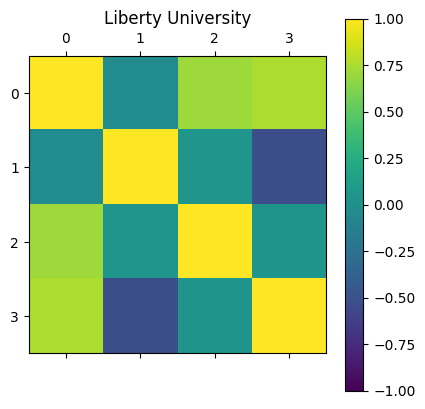

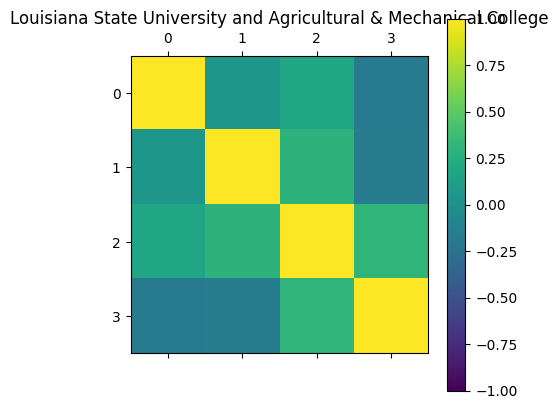

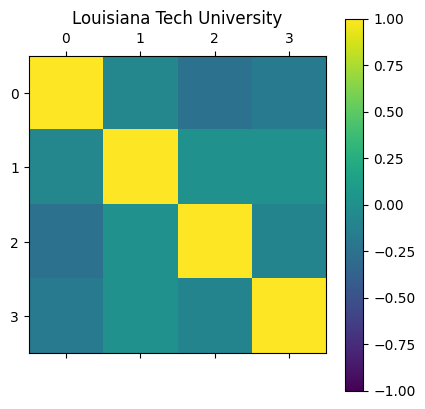

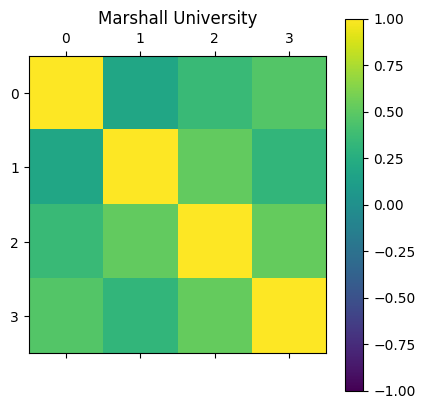

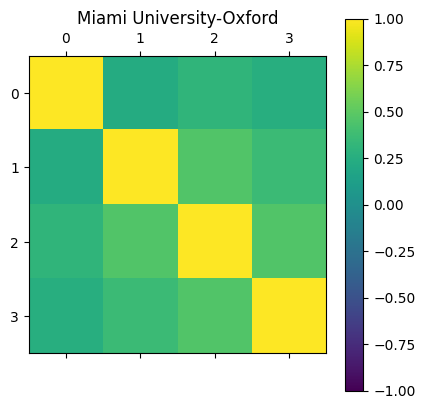

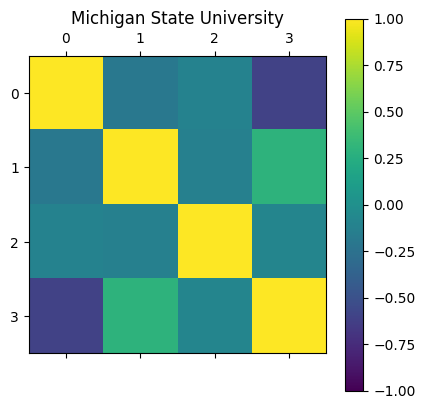

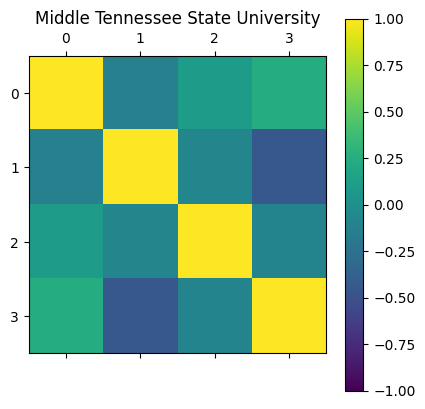

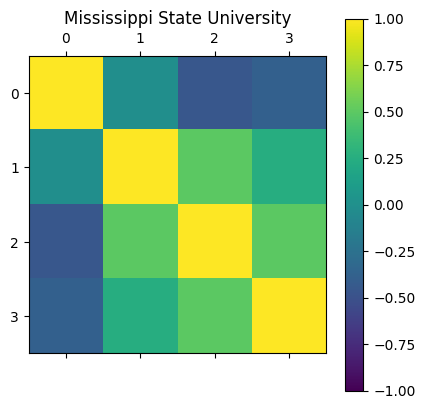

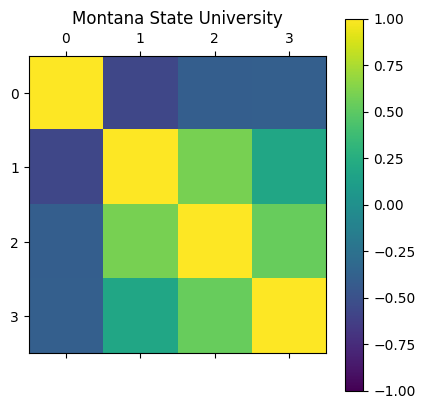

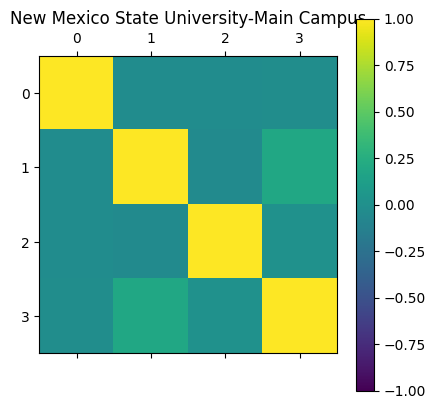

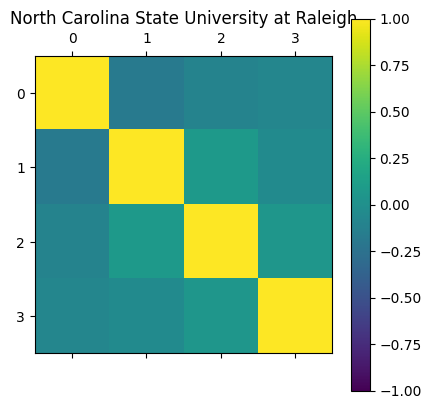

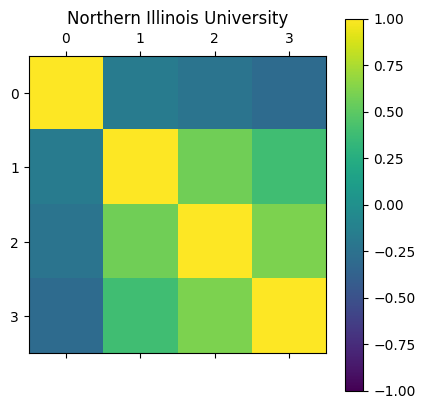

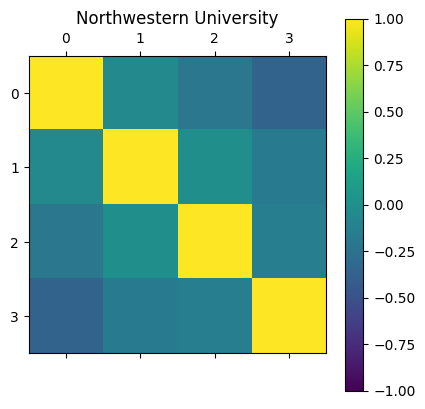

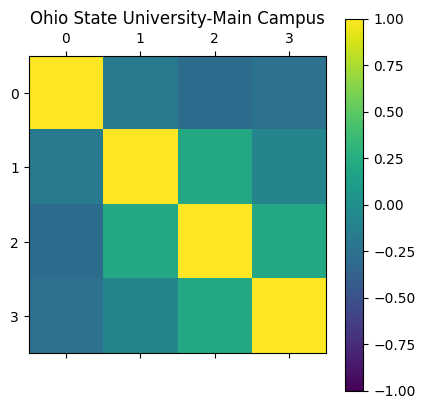

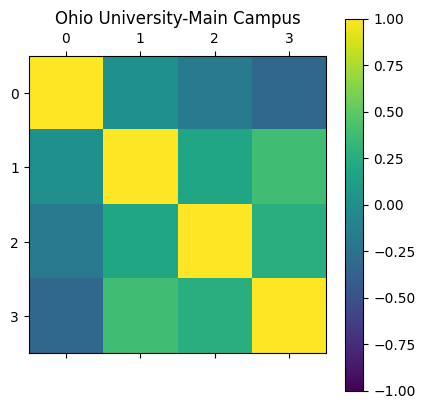

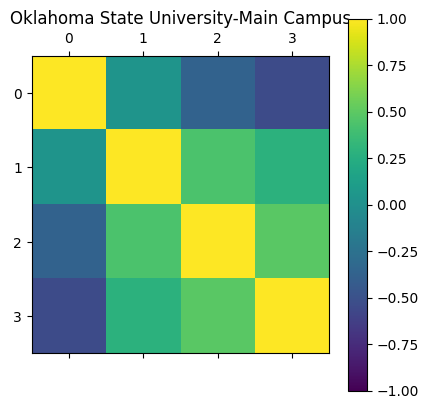

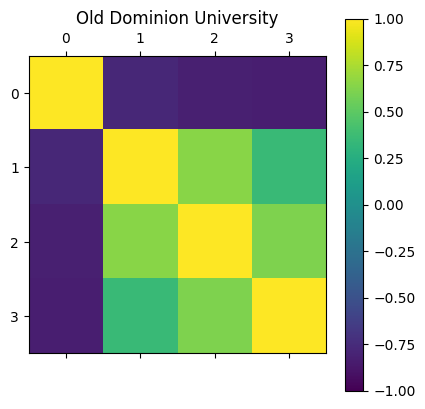

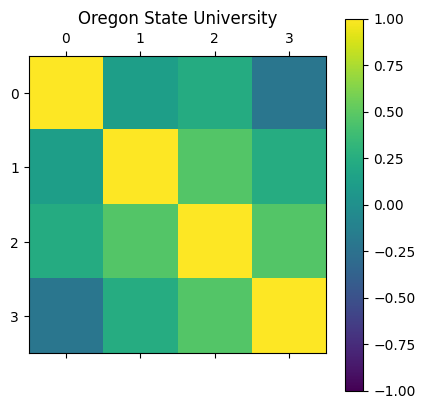

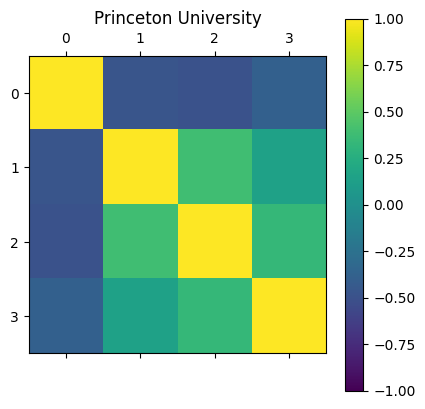

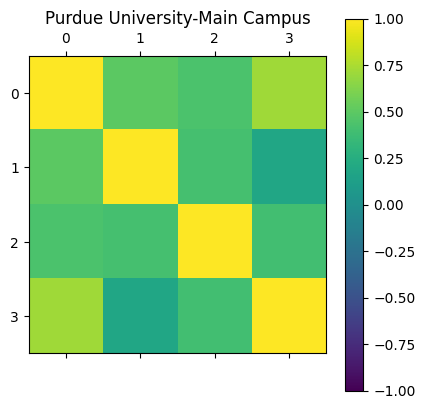

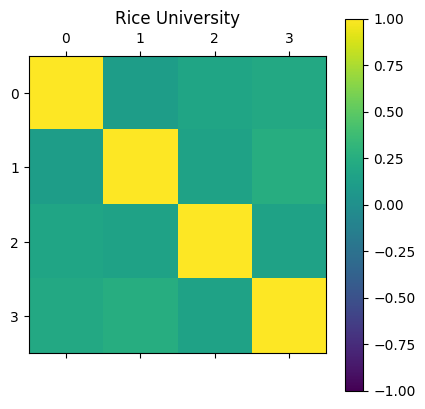

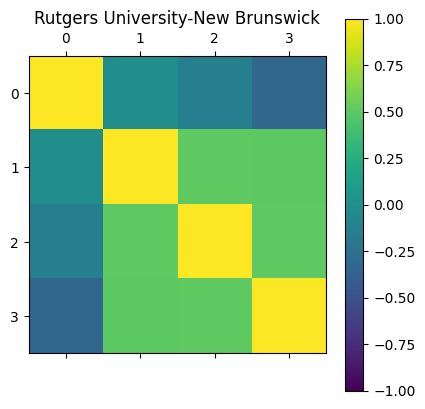

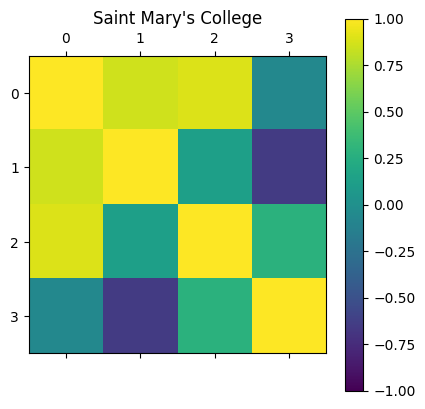

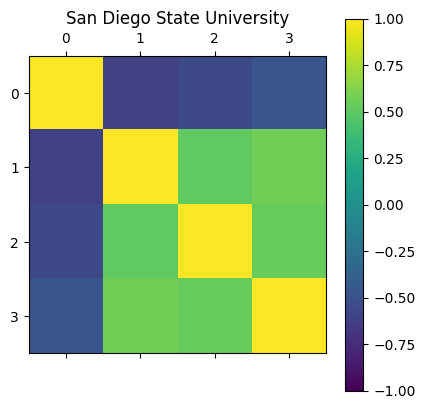

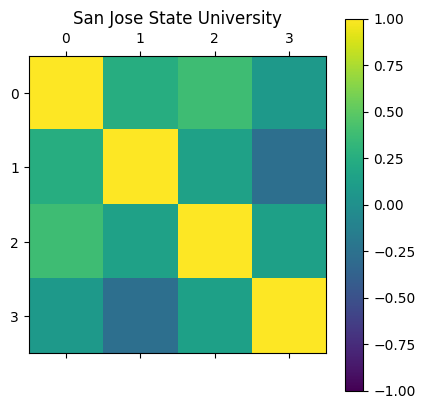

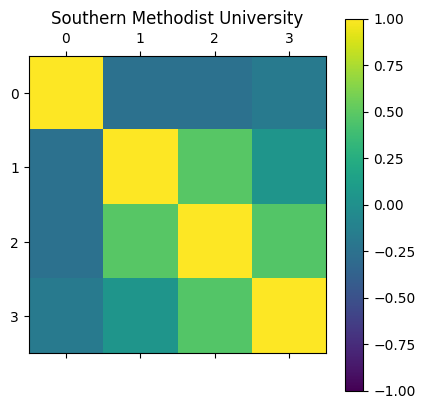

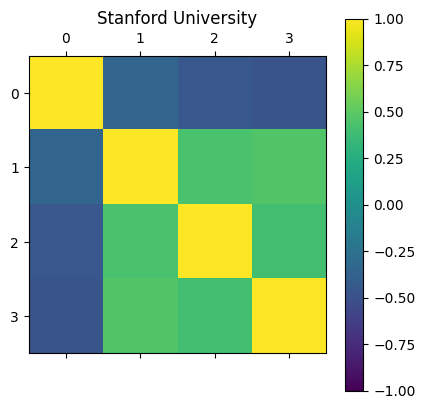

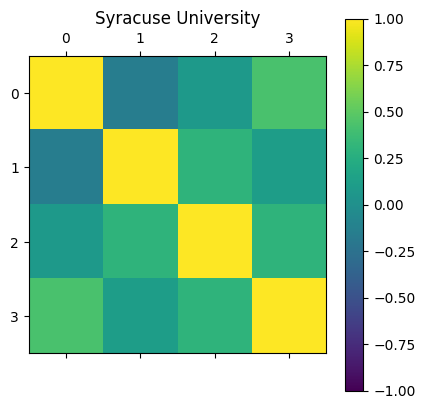

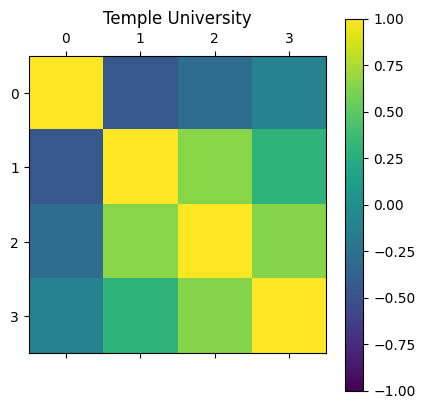

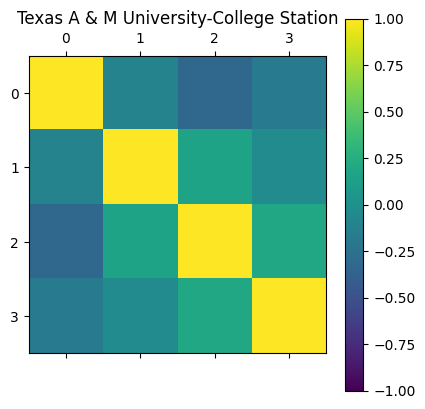

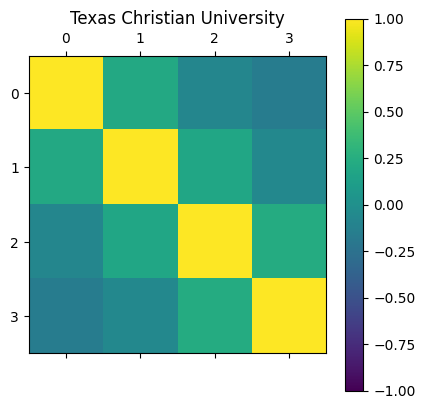

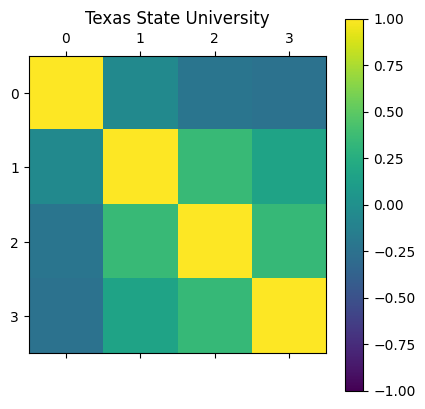

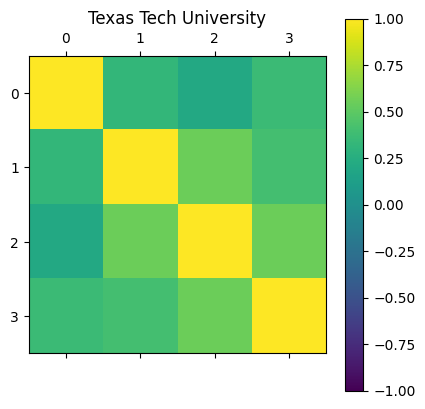

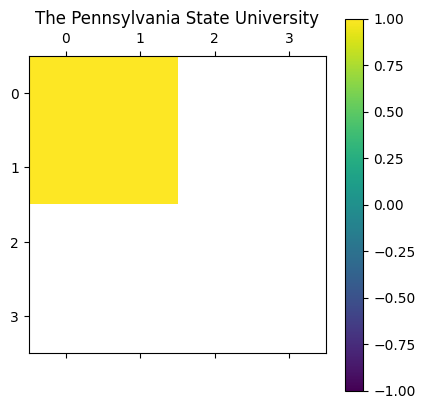

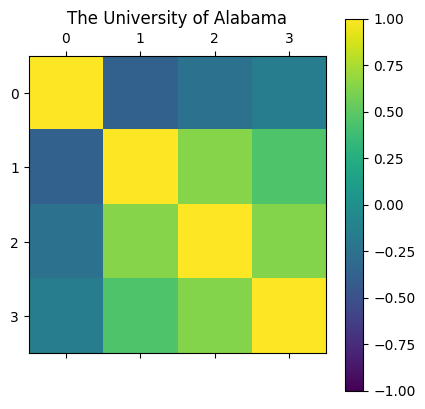

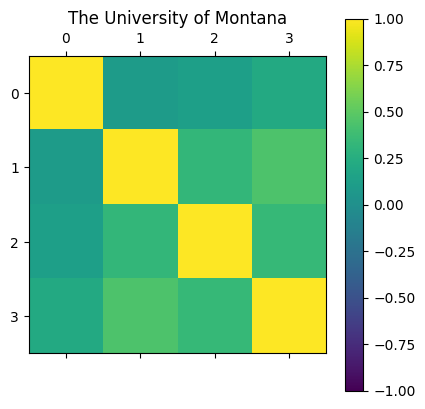

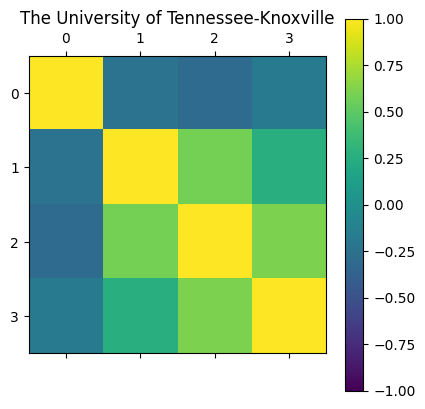

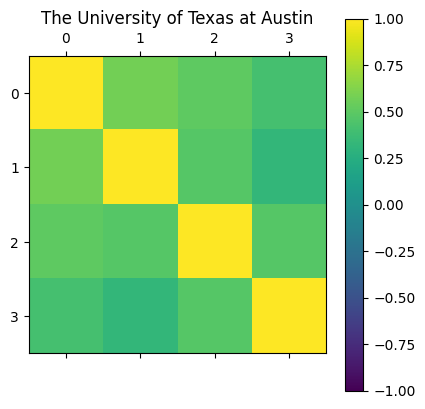

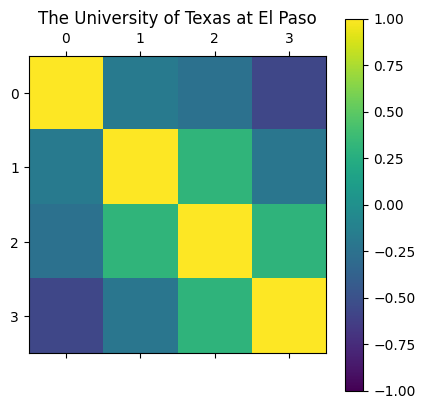

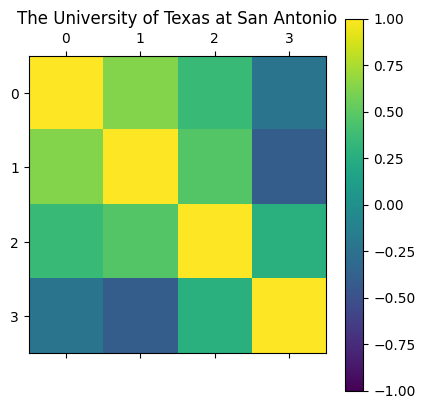

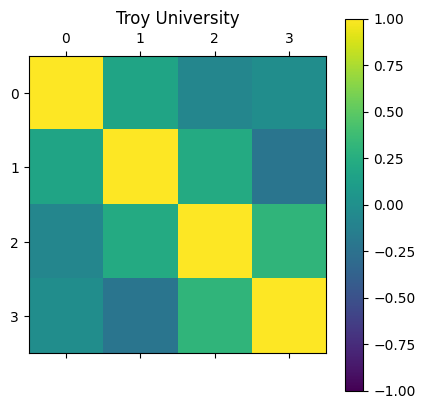

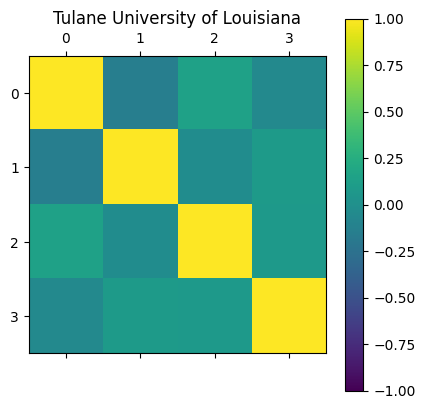

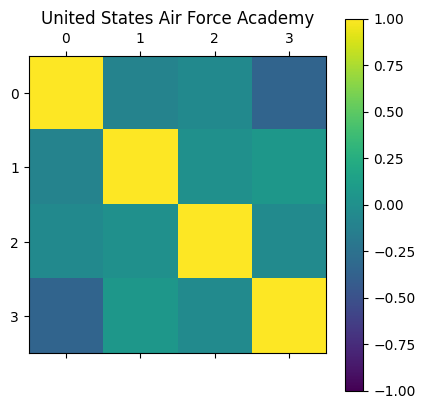

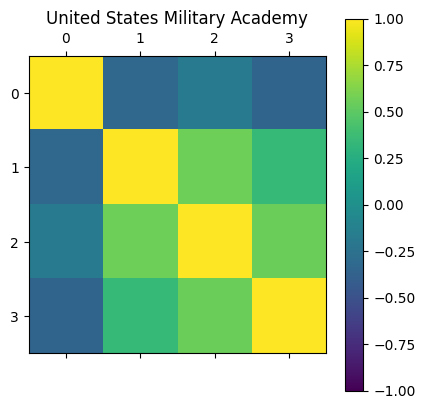

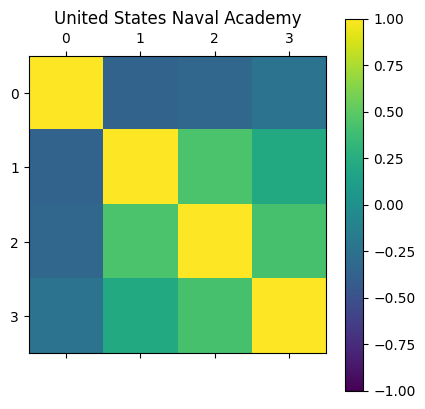

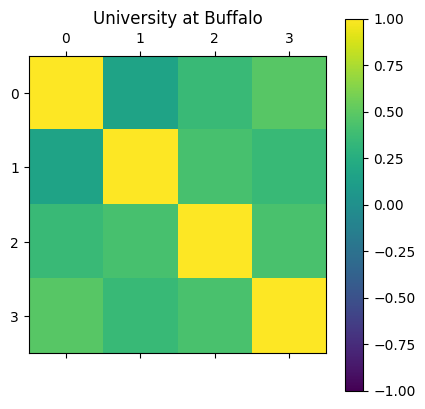

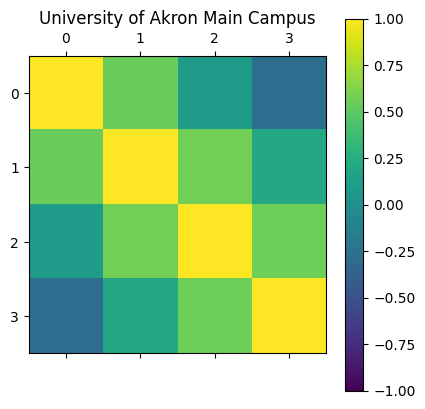

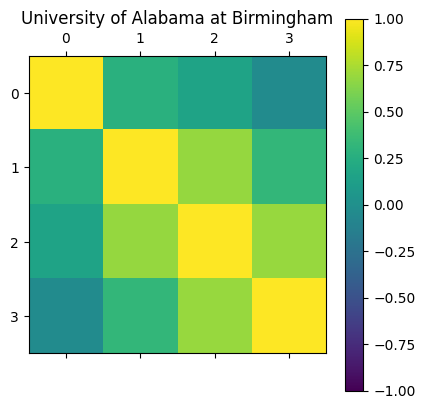

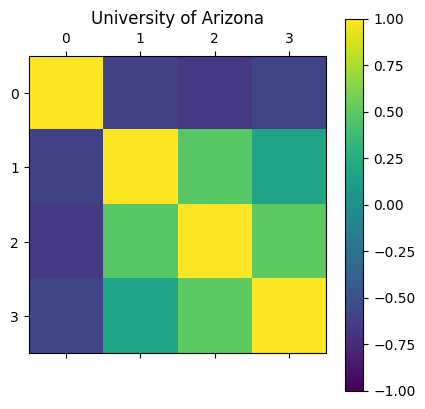

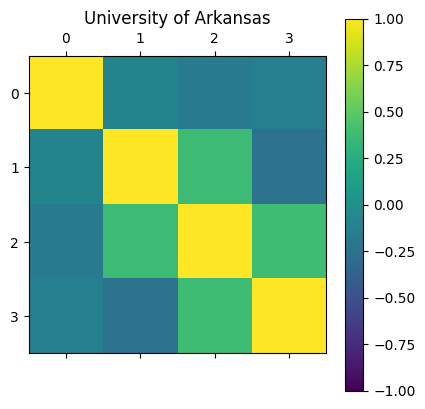

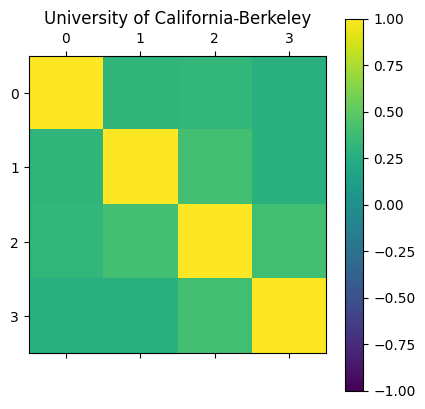

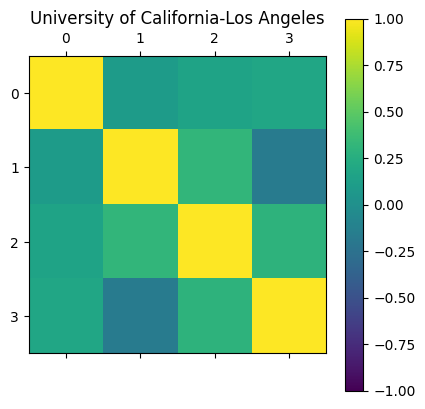

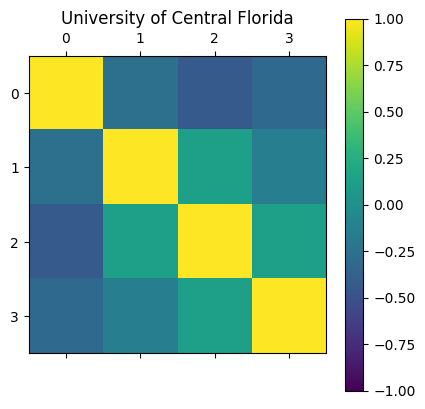

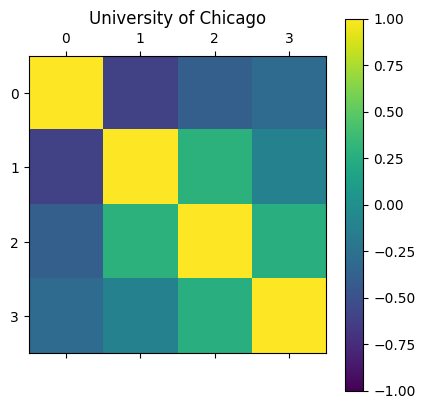

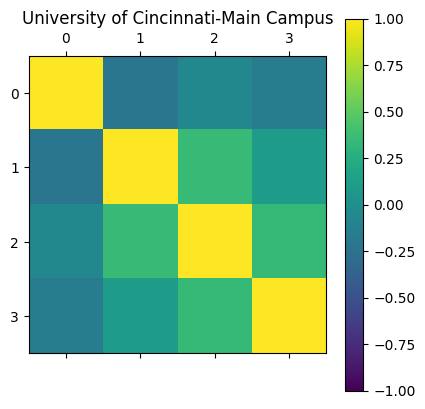

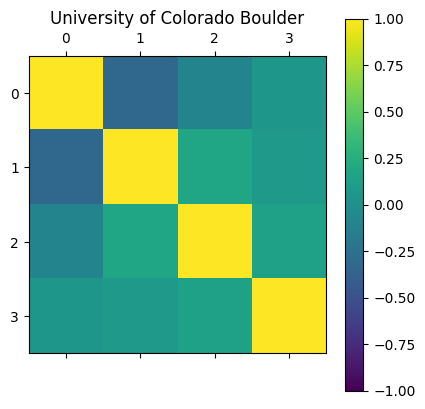

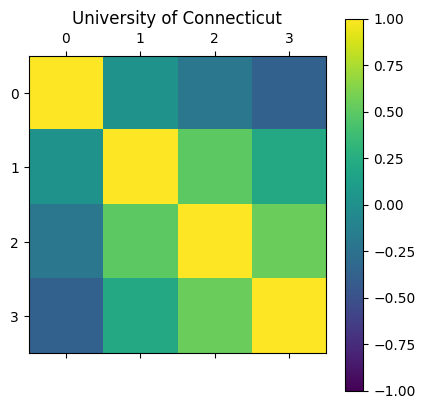

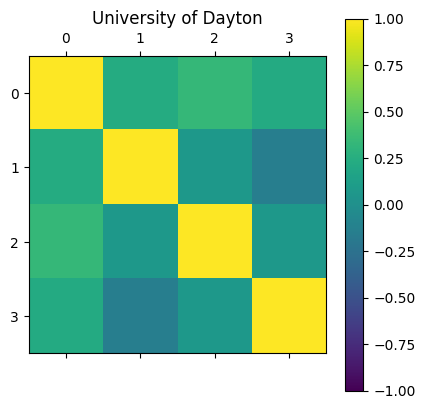

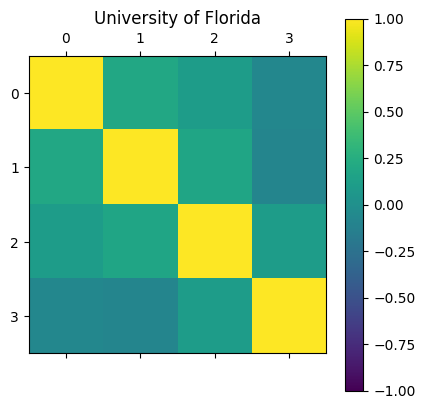

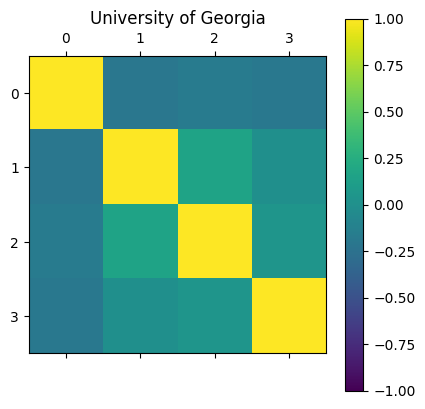

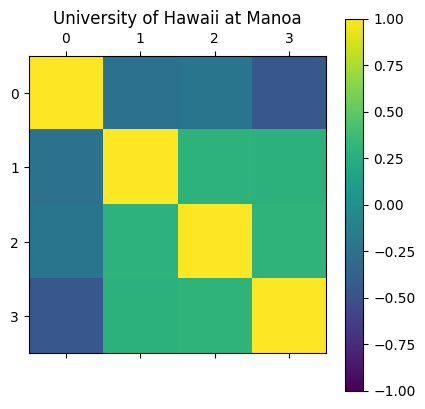

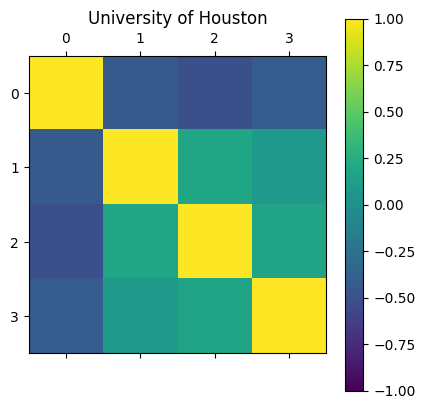

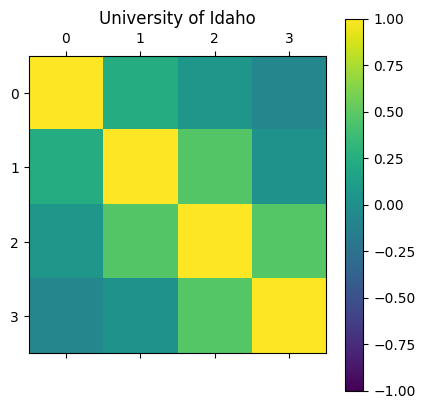

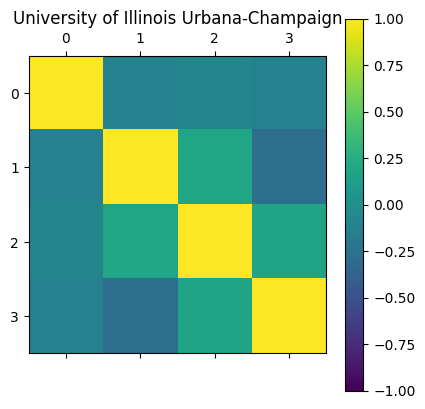

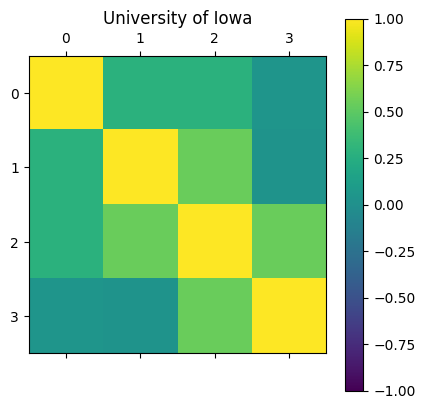

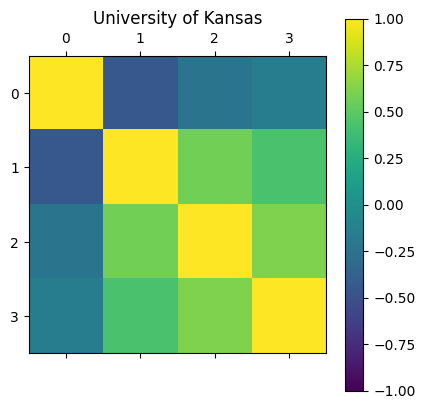

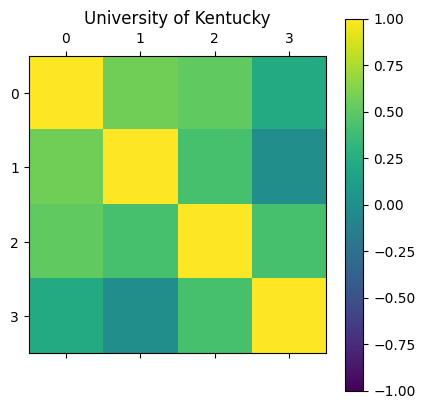

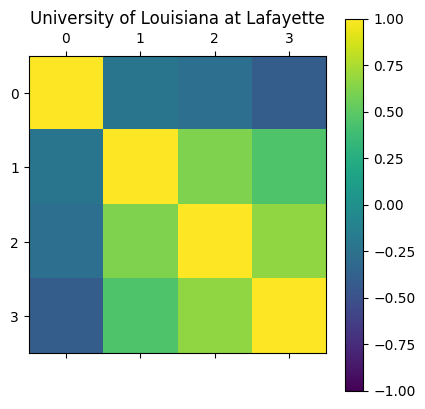

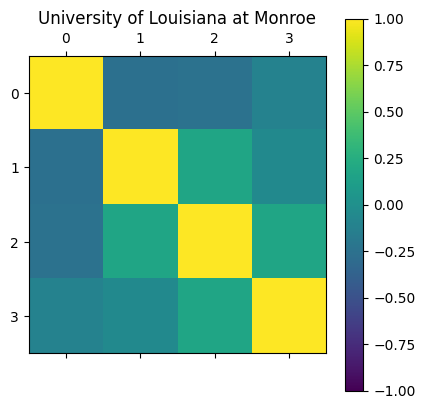

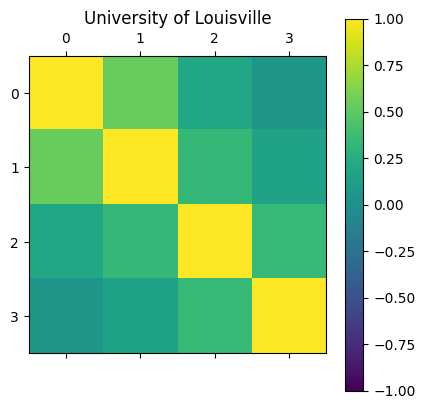

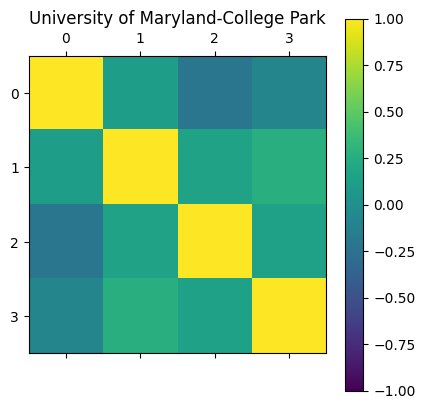

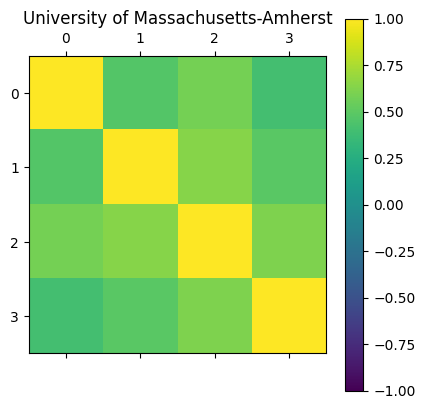

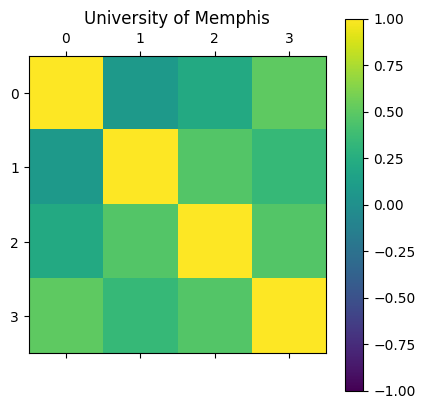

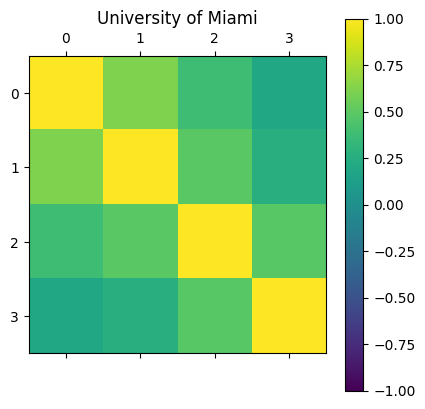

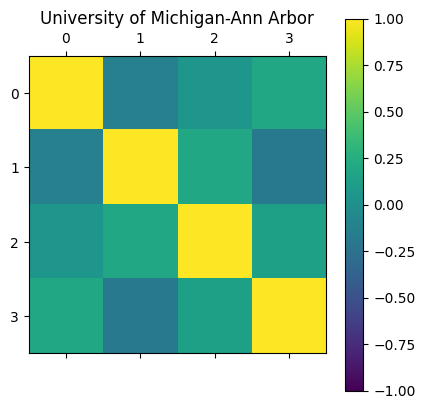

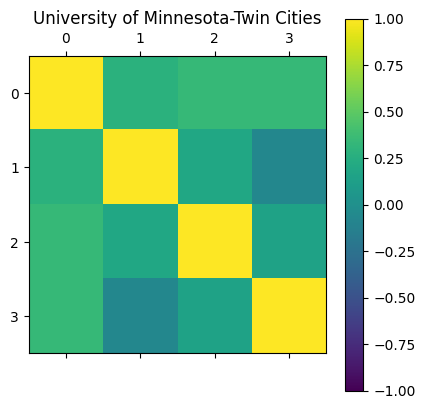

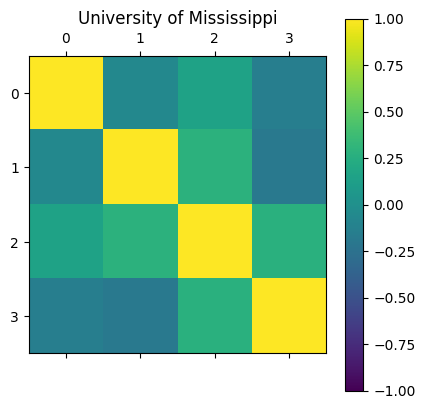

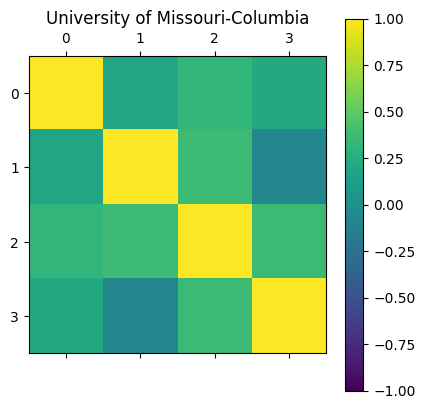

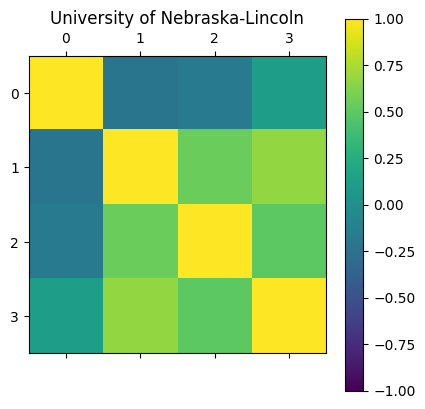

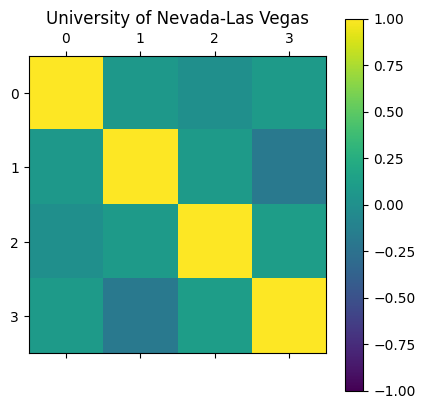

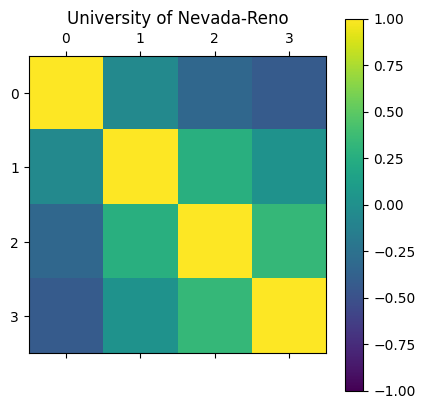

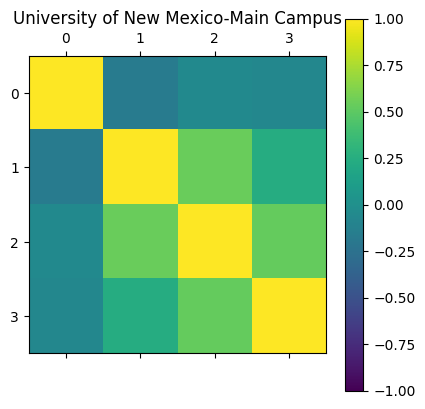

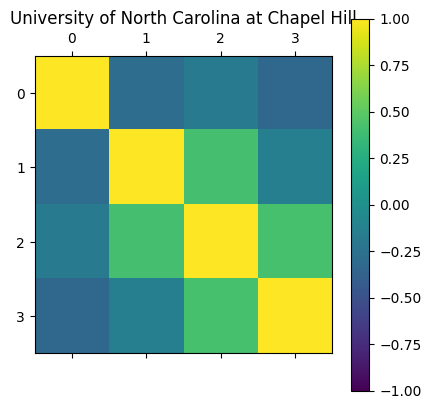

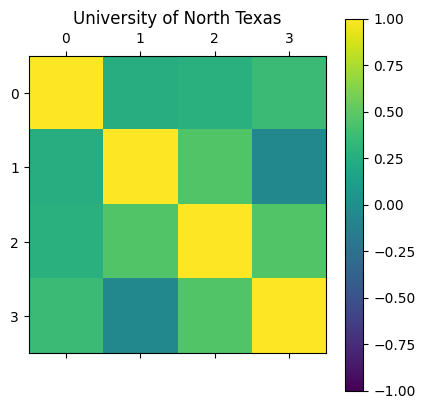

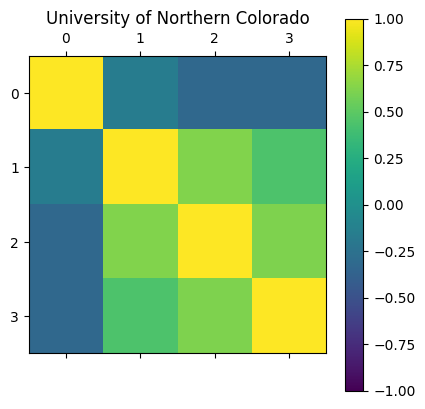

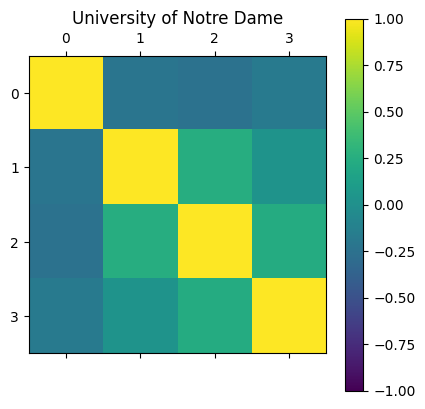

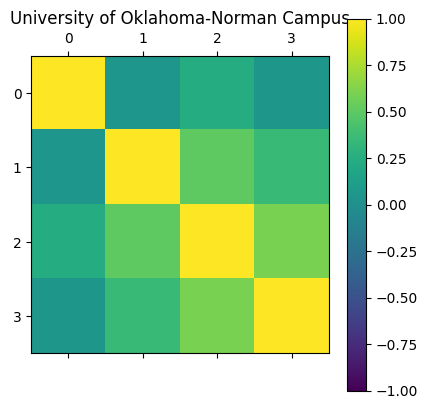

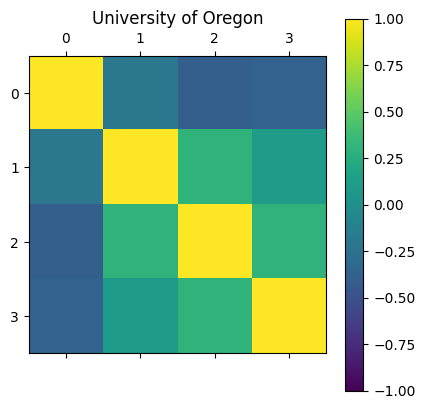

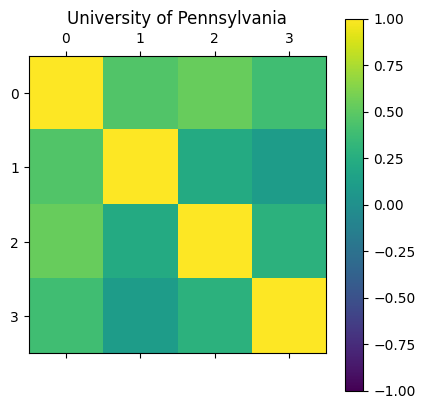

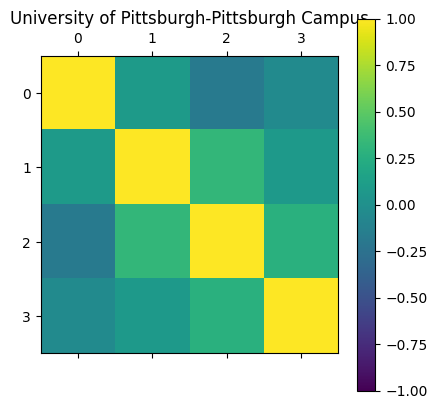

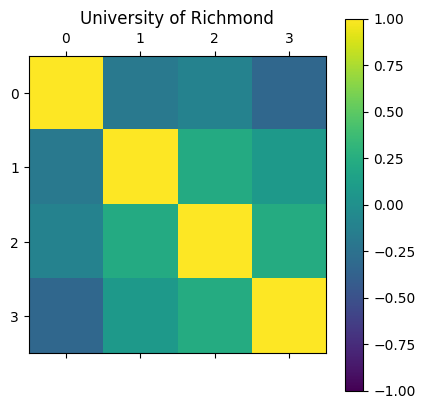

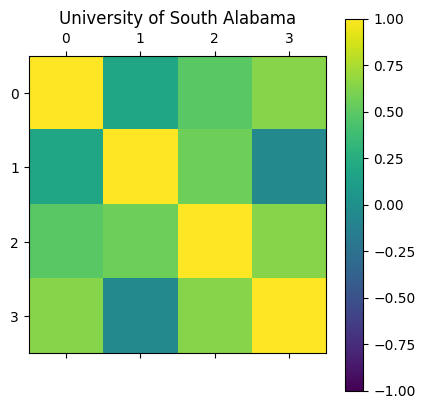

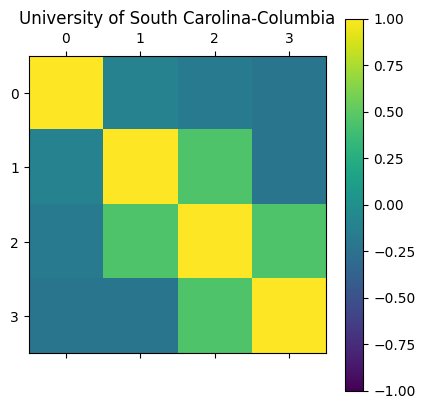

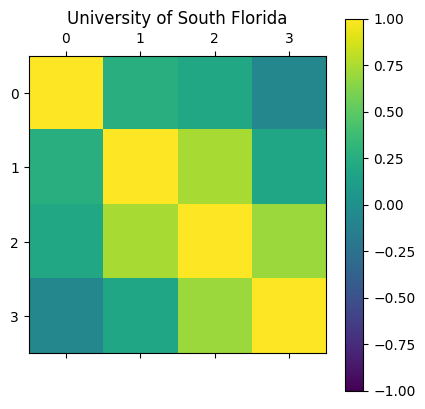

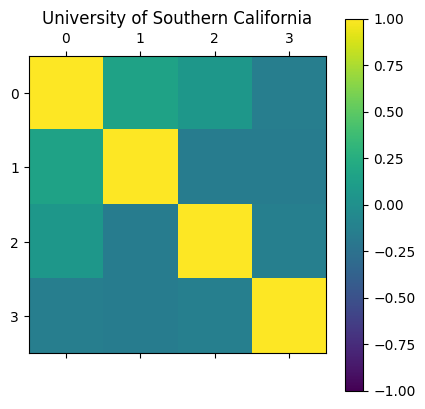

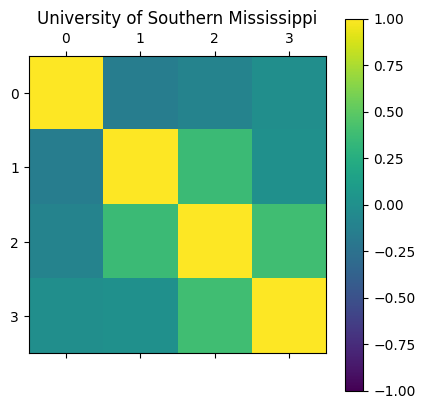

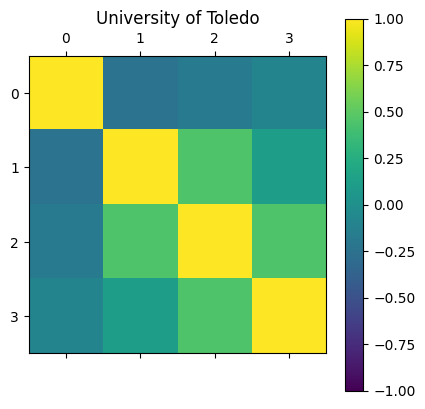

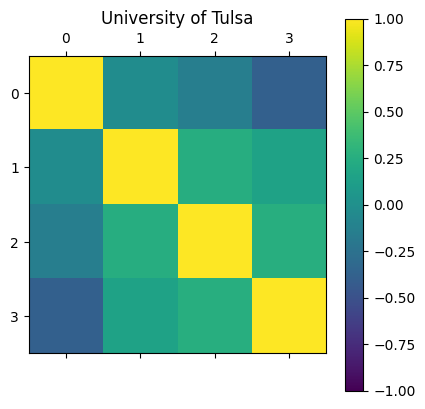

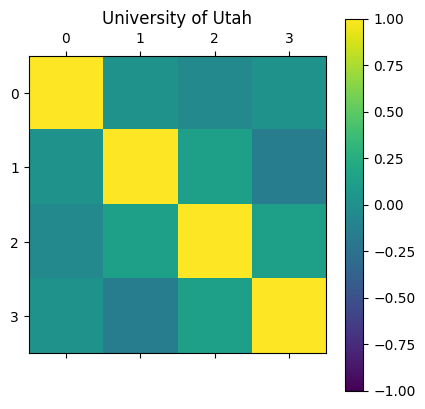

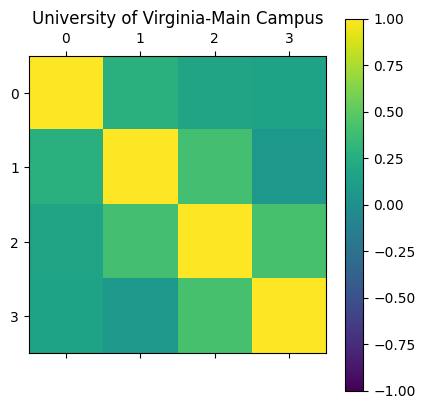

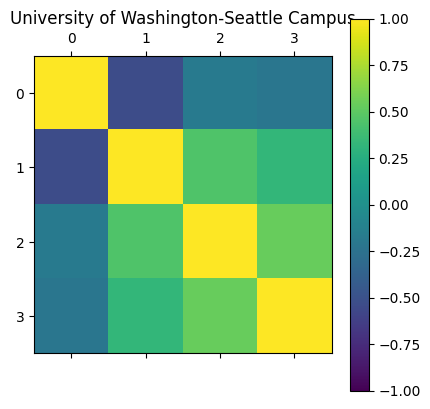

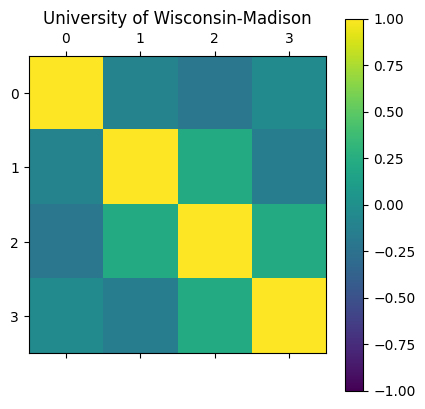

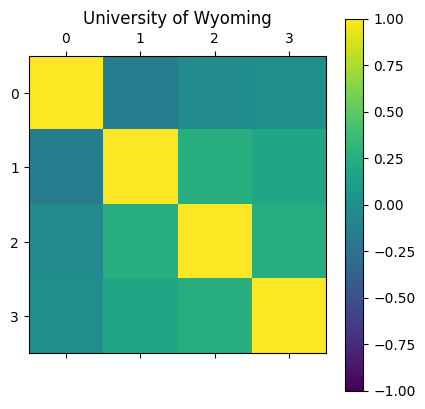

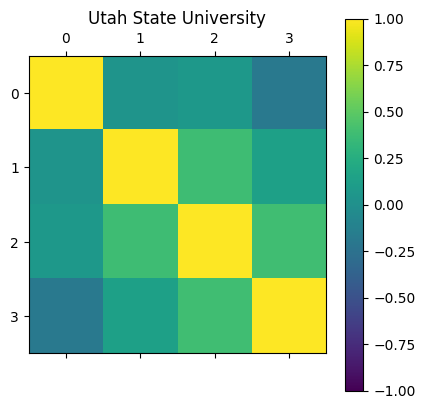

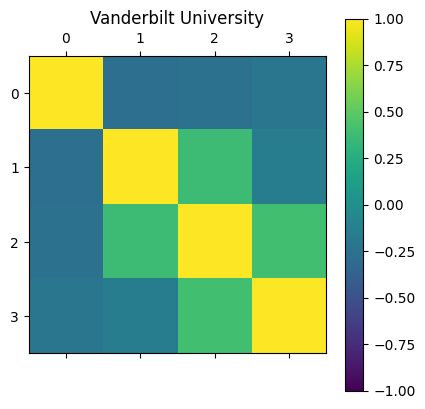

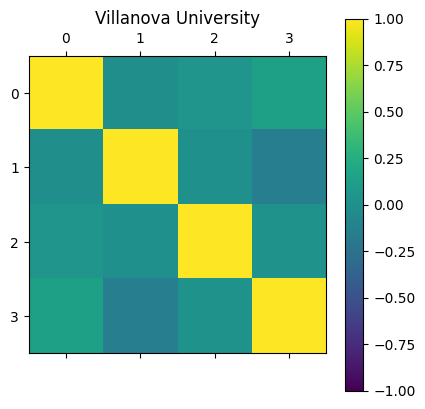

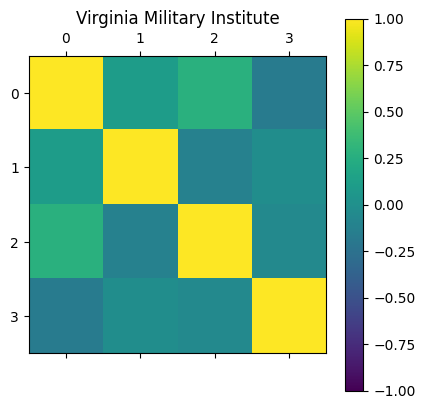

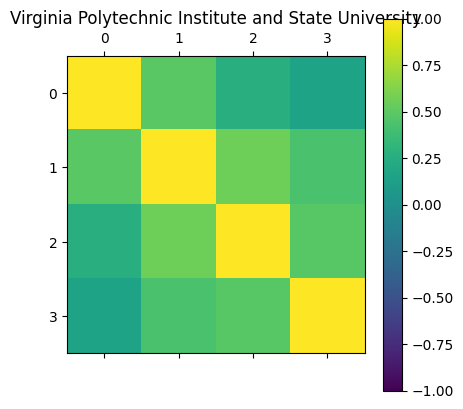

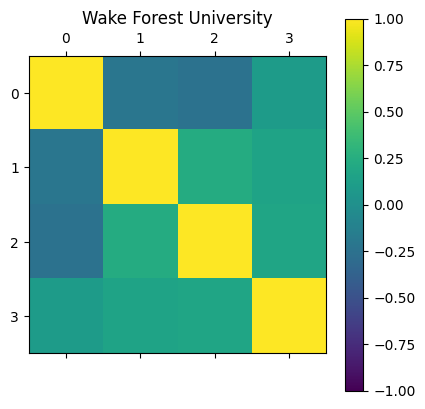

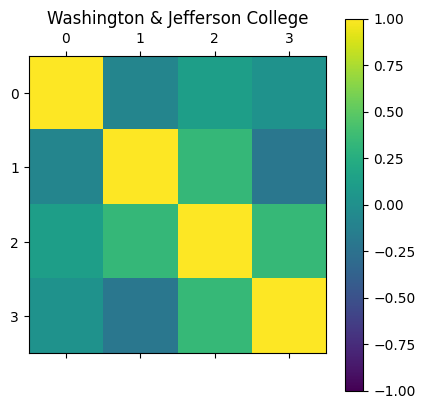

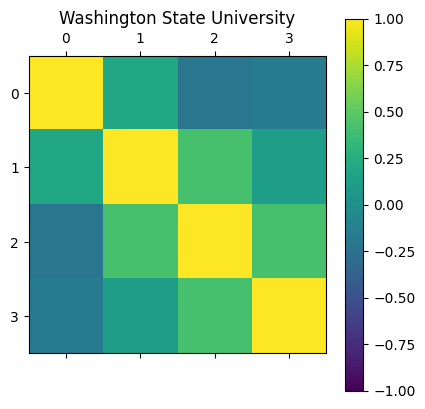

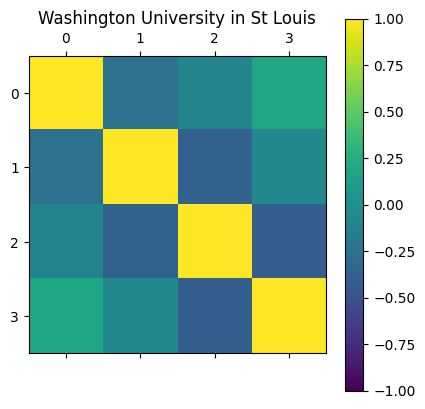

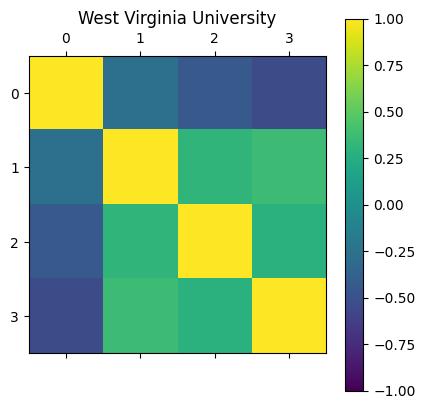

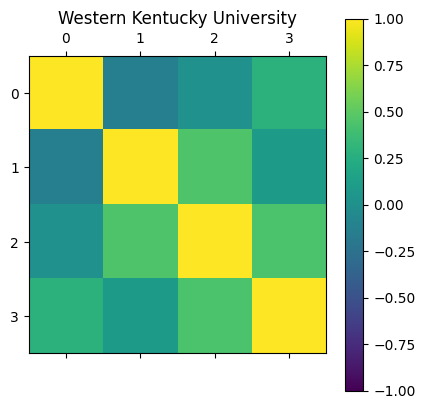

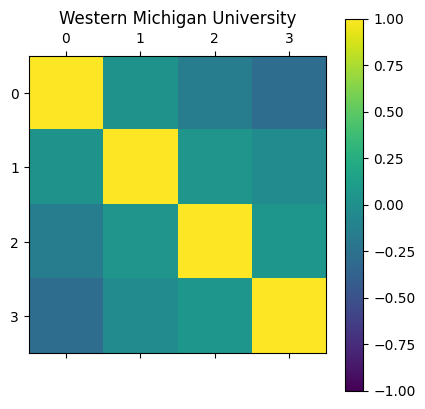

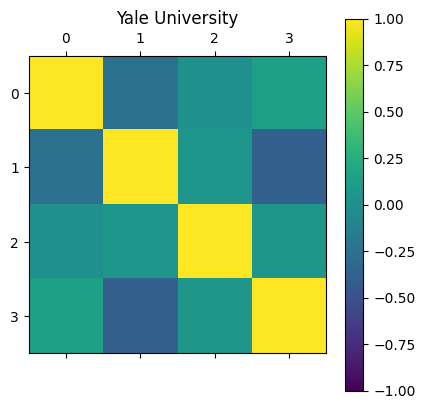

In [33]:
for group, df in fb.groupby('INSTNM'):
    df['WINPERC_1'] = df['WINPERC'].shift(1)
    df['WINPERC_2'] = df['WINPERC'].shift(2)
    plt.matshow(df[['ADM_RATE', 'WINPERC', "WINPERC_1", "WINPERC_2"]].corr())
    plt.title(group)
    plt.clim(-1, 1)
    plt.colorbar()
    plt.show()

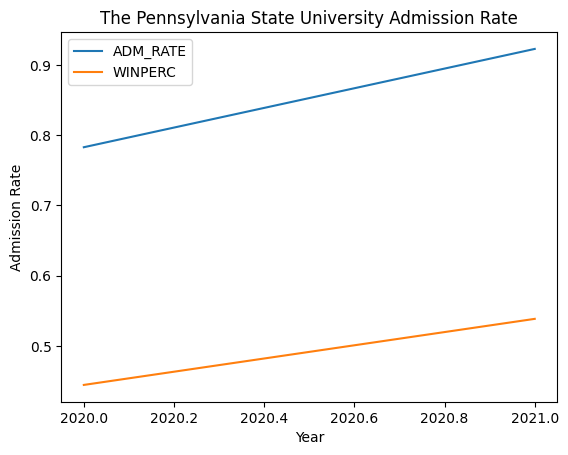

In [40]:
SCHOOL = 'The Pennsylvania State University'

fb.loc[SCHOOL][['ADM_RATE', 'WINPERC']].plot()
plt.title(f"{SCHOOL} Admission Rate")
plt.xlabel("Year")
plt.ylabel("Admission Rate")
plt.show()

In [48]:
X = fb[[
    "REGION",
    "CCSIZSET",
    "ACTCMMID",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "C150_4",
    "RET_FT4",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "MDCOST_ALL"
]]

X = X.fillna(0)

y_adm = fb['ADM_RATE']
y_ugds = fb['UGDS']
y_sat = fb['SAT_AVG']

In [49]:
from statsmodels.api import OLS


In [50]:
model = OLS(y_adm, X)
results = model.fit()
results.summary()

/opt/homebrew/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ADM_RATE   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                         nan
Time:                        21:06:33   Log-Likelihood:                             nan
No. Observations:                4224   AIC:                                        nan
Df Residuals:                    4211   BIC:                                        nan
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
REGION                nan        nan        nan        nan         nan         nan
CCSIZSET              nan        nan        nan        nan         nan         nan
ACTCMMID              nan        nan        nan        nan         nan         nan
UGDS_WHITE            nan        nan        nan        nan         nan         nan
UGDS_BLACK            nan        nan        nan        nan         nan         nan
UGDS_HISP             nan        nan        nan        nan         nan         nan
UGDS_ASIAN            nan        nan        nan        nan         nan         nan
TUITIONFEE_IN         nan        nan        nan        nan         nan         nan
TUITIONFEE_OUT        nan        nan        nan        nan         nan         nan
C150_4                nan        nan        nan        nan         nan         nan
RET_FT4               nan        nan        nan        nan         nan         nan
UGDS_MEN              nan        nan        nan        nan         nan         nan
UGDS_WOMEN            nan        nan        nan        nan         nan         nan
MDCOST_ALL            nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""